In [58]:
'''
Author: Boqun Shu
ID:261070388
Individual Assignment1
INSY695
'''

'\nAuthor: Boqun Shu\nID:261070388\nIndividual Assignment1\nINSY695\n'

In [59]:
import sys

assert sys.version_info >= (3, 7)

In [60]:
from packaging import version
import sklearn



# The Problem

In this project, the usecase I picked is develop a supervised learning model which is useful to support the oenologist wine tasting evaluations and improve wine production. The goal is to model and predict wine quality based on physicochemical test observations. Results can be used to improve winemaking by identifying the most influential factors and to stratify wines such as premium brands. The performance will be measured by the accuency(precision,recall,etc.) and MSE

# Data Acquisition

The data is Wine Quality Data Set I found from UCI Machine Learning Repository. The dataset I choose is White vinho verde wine samples, from the north of Portugal. Which has 4898 records and 12 columns

In [61]:
import urllib.request
import pandas as pd
from pathlib import Path

#Data source online via url
data = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv').read().decode('utf-8')
df = pd.DataFrame([x.split(';') for x in data.split('\n')])

#From local file
wine_data = pd.read_csv('/Users/macbook/Desktop/winequality-white.csv')


In [62]:
wine_data.shape

(4898, 12)

In [63]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# Split Test Set

In [64]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [65]:
train_set, test_set = shuffle_and_split_data(wine_data, 0.2)
len(train_set)

3919

In [66]:
len(test_set)

979

In [67]:
np.random.seed(1)

# Data Exploration

In [68]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Look at the target variable

In [69]:
wine_data["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Most of the quality of wine in the dataset are sitting in the middle

In [70]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Looking for Correlations

In [71]:
corr_matrix = wine_data.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

# Check missing value

In [72]:

print(wine_data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Discover and Visualize the Data

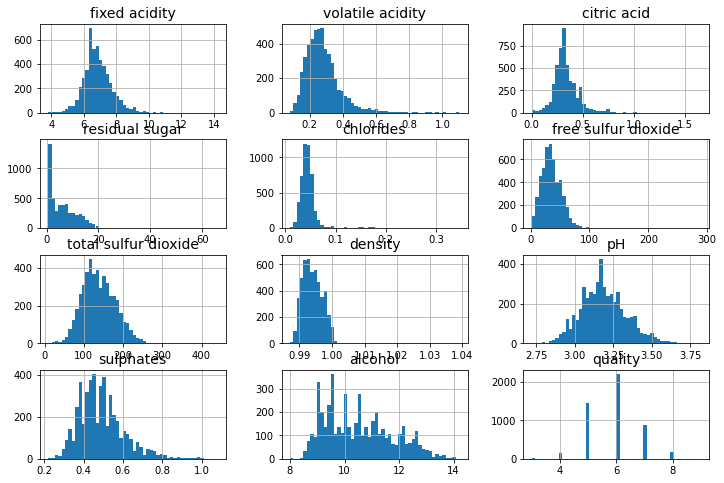

In [73]:
import matplotlib.pyplot as plt


plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

wine_data.hist(bins=50, figsize=(12, 8))

plt.show()

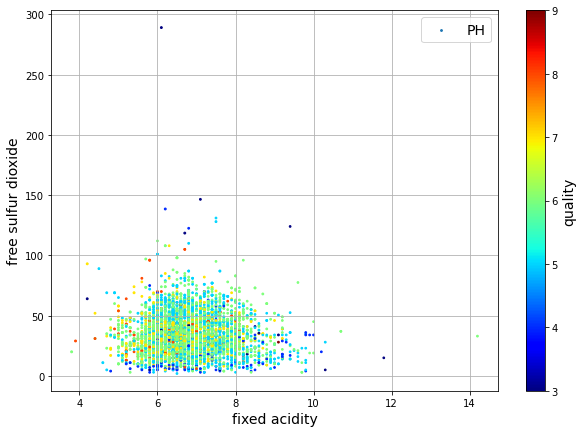

In [74]:
wine_data.plot(kind="scatter", x="fixed acidity", y="free sulfur dioxide", grid=True,
             s=wine_data["pH"], label="PH",
             c="quality", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

plt.show()

The insights are: Our target variable qulity is imbalanced, most of wine sit in the middle (mid level of quality); a lot of wine's total sulfur dioxide is 0; The other predictors seems like normal distributed except alcohol. And we can see there are some outliers

# Data Preparation

In [75]:
wine = train_set.drop("quality", axis=1)
wine_labels = train_set["quality"].copy()

There is no need to deal with missing value and data already been cleaned

In [76]:
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


# outlier detection

In [77]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=1)
outlier_pred = isolation_forest.fit_predict(wine)

In [78]:
outlier_pred

array([1, 1, 1, ..., 1, 1, 1])

In [79]:
wine = wine.iloc[outlier_pred == 1]
wine_labels = wine_labels.iloc[outlier_pred == 1]

In [80]:
len(wine)

3648

# Feature Scaling

In [81]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
wine_num_min_max_scaled = min_max_scaler.fit_transform(wine)

# Standardize

In [96]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
wine_std_scaled = std_scaler.fit_transform(wine)


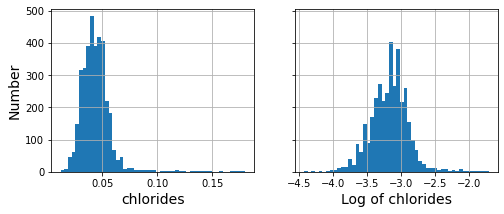

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
wine["chlorides"].hist(ax=axs[0], bins=50)
wine["chlorides"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("chlorides")
axs[1].set_xlabel("Log of chlorides")
axs[0].set_ylabel("Number")

plt.show()

# Clustering

In [84]:
from sklearn.decomposition import PCA

# Create an instance of the PCA class
pca = PCA(n_components=3)

# Fit the PCA model to the Data
pca.fit(wine)

# Transform the DataFrame using the PCA model
wine_transformed = pca.transform(wine)

In [85]:
print(pca.explained_variance_ratio_)

[0.90828155 0.08086762 0.00996382]


the first principal component explains 91% of the variance in the original data, the second principal component explains 8% of the variance, and the third principal component explains the remaining 1% of the variance

# Modeling

In [86]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine, wine_labels)

LinearRegression()

In [87]:
lin_predictions = lin_reg.predict(wine)
lin_predictions[:5].round()  

array([5., 6., 6., 6., 6.])

In [88]:
wine_labels.iloc[:5].values

array([6, 7, 5, 6, 5])

In [89]:
error_ratios = lin_predictions[:5].round() / wine_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-16.7%, -14.3%, 20.0%, 0.0%, 20.0%


In [90]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(wine_labels, lin_predictions,
                              squared=False)
lin_rmse

0.7319415745627357

# SVM

In [121]:
from sklearn.svm import SVC


# Create an instance of the SVC class
clf = SVC(C=0.1, kernel='linear')

# Fit the SVM model to the Data
clf.fit(wine_std_scaled, wine_labels)

# Predict the labels for data
svm_predictions = clf.predict(wine_std_scaled)
svm_predictions[:5]


array([5, 6, 5, 6, 5])

In [122]:
wine_labels.iloc[:5].values

array([6, 7, 5, 6, 5])

In [123]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
svm_accuracy = accuracy_score(wine_labels, svm_predictions.round())
print("Accuracy:", svm_accuracy)

Accuracy: 0.5274122807017544


In [124]:
from sklearn.metrics import mean_squared_error

svm_rmse = mean_squared_error(wine_labels, svm_predictions.round(),
                              squared=False)
svm_rmse

0.8185084852039575

# NN

In [99]:
from sklearn.neural_network import MLPClassifier

# Create an instance of the MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

# Fit the Neural Network model to the DataFrame
nn.fit(wine_std_scaled, wine_labels)

# Predict the labels for new data
nn_predictions = nn.predict(wine_std_scaled)
nn_predictions[:5]

array([5, 6, 5, 6, 5])

In [100]:
from sklearn.metrics import mean_squared_error

nn_rmse = mean_squared_error(wine_labels, nn_predictions.round(),
                              squared=False)
nn_rmse

0.7294329087867182

In [101]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the model
nn_accuracy = accuracy_score(wine_labels, nn_predictions.round())
print("Accuracy:", nn_accuracy)

Accuracy: 0.5882675438596491


# cross-validation

In [107]:
from sklearn.model_selection import cross_val_score

svm_rmses = -cross_val_score(clf, wine_std_scaled, wine_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(svm_rmses).describe()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


count    10.000000
mean      0.820624
std       0.020408
min       0.793812
25%       0.804525
50%       0.819847
75%       0.833002
max       0.856882
dtype: float64

In [108]:
from sklearn.model_selection import cross_val_score

nn_rmses = -cross_val_score(nn, wine_std_scaled, wine_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

pd.Series(nn_rmses).describe()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


count    10.000000
mean      0.759241
std       0.035259
min       0.711934
25%       0.733074
50%       0.761739
75%       0.770149
max       0.830910
dtype: float64

The Nerual network gain lower MSE both in training and cross-validation

# Fine-tune the models

# Grid Search

In [114]:
nn.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [118]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(wine_std_scaled, wine_labels)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10]},
             scoring='neg_root_mean_squared_error')

In [119]:
grid_search.best_params_

{'C': 0.1}

In [120]:
grid_search.best_estimator_

SVC(C=0.1, kernel='linear')

In [128]:
# Define the grid of hyperparameters to search
param_grid = {'hidden_layer_sizes': [(10,), (20,), (10, 5)],
              'activation': ['relu', 'tanh'],
              'learning_rate_init': [0.001, 0.01, 0.1]
             }

# Create a GridSearchCV object
grid_search = GridSearchCV(nn, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(wine_std_scaled, wine_labels)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.01}
Best accuracy: -0.7551094118722443


# The final model

In [141]:
##Choose NN as my final model
final_model = nn


# Test the model by using use dataset as we split previously

In [145]:
X_test = test_set.drop("quality", axis=1)
X_test_std = std_scaler.fit_transform(X_test)
y_test = test_set["quality"].copy()

final_predictions = final_model.predict(X_test_std)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

0.788709914942432


In [146]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.74645574, 0.8288127 ])